<a href="https://colab.research.google.com/github/abhiramikc/python/blob/main/myCopy_of_Assignment_4_Random_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
from random import sample
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)
# print(X_train.shape)
# print(y_train.shape)


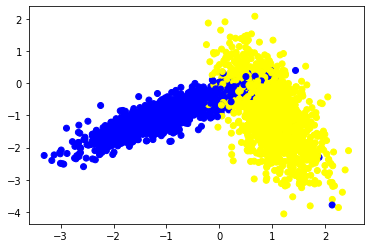

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
colors=['yellow','blue']
plt.scatter(X_test[:,0], X_test[:,1],c=y_test,cmap=matplotlib.colors.ListedColormap(colors))
# plt.scatter(X_test[:,0], X_test[:,1],c=y_test,cmap='Accent_r')
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [ ]:
#https://stackoverflow.com/questions/9755538/how-do-i-create-a-list-of-random-numbers-without-duplicates/9755548#9755548
#https://stackoverflow.com/questions/15181867/understanding-the-set-function

def randomly_selected_num(x_train):
  return random.sample(range(0,len(x_train)),int(0.6*len(x_train)))

def Random_search_crossvalidation(x_train,y_train, classifier, folds, param_range):
  trainscore=[]
  testscore=[]
  num_param=10
  Random_K_values = sample(range(param_range[0],param_range[1]),num_param)
  Random_K_values.sort()
  print("Random k range",Random_K_values)
  for rk in tqdm(Random_K_values):
    trainscore_folds=[]
    testscore_folds=[]
    for j in range(0,folds):
      train_indices=randomly_selected_num(x_train)
      # print(train_indices)
      test_indices=list(set(list(range(1,len(x_train))))- set(train_indices))

      X_train=x_train[train_indices]
      Y_train=y_train[train_indices]
      X_test=x_train[test_indices]
      Y_test=y_train[test_indices]

      classifier.n_neighs = rk
      classifier.fit(X_train,Y_train)

      Y_predicted=classifier.predict(X_test)
      testscore_folds.append(accuracy_score(Y_test,Y_predicted))

      Y_predicted=classifier.predict(X_train)
      trainscore_folds.append(accuracy_score(Y_train,Y_predicted))
    trainscore.append(np.mean(np.array(trainscore_folds)))
    testscore.append(np.mean(np.array(testscore_folds)))
  return trainscore,testscore,Random_K_values

In [ ]:

classifier=KNeighborsClassifier()
p_min=1
p_max=50
k_fold=3
param_range=(p_min,p_max)
print(type(param_range),param_range)
trainscore,testscore,Random_K_values=Random_search_crossvalidation(X_train,y_train,classifier,k_fold,param_range)

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'> (1, 50)
Random k range [4, 5, 7, 8, 15, 19, 25, 32, 36, 46]


100%|██████████| 10/10 [00:06<00:00,  1.53it/s]


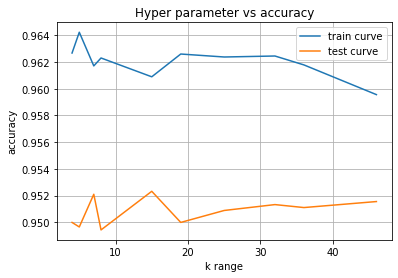

In [ ]:
plt.plot(Random_K_values,trainscore,label="train curve")
plt.plot(Random_K_values,testscore,label="test curve")
plt.title("Hyper parameter vs accuracy")
plt.legend()
plt.xlabel("k range")
plt.ylabel("accuracy")
plt.grid()
plt.show()

In [ ]:
#code copied from the reference notebook for this assignment 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

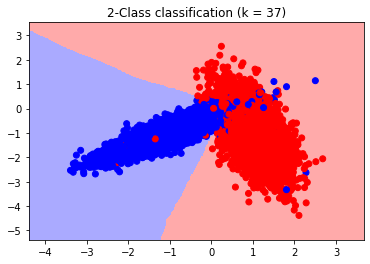

In [ ]:
#from the graph gape between train and test curve is small when k is in range of 30-40. so taking k=35
from matplotlib.colors import ListedColormap
neigh=KNeighborsClassifier(n_neighbors=37)
neigh.fit(X_train,y_train)
plot_decision_boundary(X_train[:,0],X_train[:,1],y_train,neigh)